In [1]:
# Imports
import pandas as pd

In [29]:
# Loading in the run_data_csv
data = pd.read_csv('data/meta/run_data_meta.csv')

# Allowing to see all the columns in data
pd.set_option('display.max_columns', None)

### Data:

In [25]:
# Quick look at the csv
data

,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,InjDefn,InjJoint,InjSide,SpecInjury,InjDuration,InjJoint2,InjSide2,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
0,100433,2010-10-05 13:22,20101005T132240.json,1.610861,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,Knee,Right,pain,21.0,No Injury,Right,NaN,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN
1,100434,2010-11-17 13:22,20101117T132240.json,2.237294,51,NaN,NaN,Female,NaN,Training volume/intensity affected,Lumbar Spine,Bilateral,disc degeneration,NaN,No Injury,Right,NaN,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
2,100537,2012-07-03 10:25,20120703T102550.json,2.127441,255,173.1,67.6,Female,Right,2 workouts missed in a row,Hip/Pelvis,Right,other,NaN,No Injury,Right,NaN,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
3,100560,2012-07-17 10:37,20120717T103748.json,2.657365,33,179.3,83.0,Female,Right,No injury,No Injury,Right,NaN,NaN,No Injury,Right,NaN,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
4,101481,2012-07-17 10:50,20120717T105021.json,2.625088,32,176.3,58.6,Female,NaN,No injury,"No injury,No injury",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,200986,2015-03-12 14:28,20150312T143944.json,4.876998,20,174.0,56.8,Female,Right,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Track,Competitive,8.0,Other distance,HH,5,30,2013.0,0.0
1828,200987,2015-03-12 16:08,20150312T160840.json,2.765022,50,164.0,60.0,Female,Right,Continuing to train in pain,Hip/Pelvis,Right,Pelvic malalignment,NaN,Thigh,Left,ITB syndrome,"Running, triathlon",Recreational,16.0,5K,HH,32,00,2007.0,1.0
1829,201100,2015-04-09 15:59,20150409T155915.json,2.790966,52,170.0,80.0,Male,Right,Training volume/intensity affected,Lumbar Spine,Bilateral,Muscle strain,NaN,Ankle,Right,Ligament sprain,NaN,Recreational,30.0,NaN,HH,MM,SS,NaN,0.0
1830,201101,2015-04-13 14:31,20150413T143152.json,2.828602,21,162.0,65.5,Male,Right,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recreational,NaN,NaN,HH,MM,SS,NaN,NaN


**Columns to drop: (check with TAs)**
- Speed (?)
- DominantLeg (can we encode the NaNs, e.g. -1=L, 0=NaN, 1=R)
- SpecInjury
- InjDuration
- injside
- Level
- YrsRunning
- the rest ... goodbyeee

### Missing values from Numerical ('meaningful') columns:

- speed_r: **None**
- Age: **None**
- Height: **3 missing values**
- Weight: **2 missing values**
- Gender: **1 value with 'Unknown'**
- Dominant Leg: **(352 missing values) (1480 w/ a value)**
- InjDefn: **(80 missing values) (1752 w/ value)**
- InjDuration: **(405 missing) (1427)**
- YrsRunning: **(517 missing) (1315)**

In [71]:
# Set option to display all rows
pd.set_option('display.max_rows', None)
# Set option to display all columns (optional)
pd.set_option('display.max_columns', None)
display(data[data['InjDefn'].isnull()].sort_values(by='sub_id'))

,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,InjDefn,InjJoint,InjSide,SpecInjury,InjDuration,InjJoint2,InjSide2,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
1093,100413,2012-05-24 10:56,20120524T105624.json,2.718630,56,183.2,76.1,Male,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,100425,2012-05-22 12:17,20120522T121758.json,2.723459,56,157.2,60.4,Female,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,100550,2012-07-04 12:41,20120704T124114.json,2.733438,57,176.0,70.1,Male,NaN,NaN,NaN,Left,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,100551,2012-07-04 10:37,20120704T103757.json,2.755183,56,176.0,83.8,Male,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,100552,2012-07-06 12:17,20120706T121758.json,2.729688,58,163.0,48.6,Female,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,100553,2012-07-06 12:34,20120706T123450.json,2.708737,57,165.5,56.9,Female,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,100554,2012-07-06 10:31,20120706T103155.json,2.706000,66,169.5,67.0,Male,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1105,100555,2012-07-09 12:55,20120709T125516.json,2.268687,68,162.0,67.8,Male,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,100556,2012-07-09 12:41,20120709T124114.json,2.305368,57,161.2,72.7,Female,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,100557,2012-07-10 12:34,20120710T123450.json,2.697751,57,178.3,75.9,Male,NaN,NaN,NaN,NaN,No injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Value counts for categorical categories:

In [44]:
exclude_cols = ['datestring', 'filename']

for col in data.select_dtypes(include='object').columns:
    if col not in exclude_cols:
        print(f"Value counts for column: '{col}'")
        print(data[col].value_counts(dropna=False))
        print("\n" + "-"*50 + "\n") #this creates a blank line before & after, and 50-dashes

### All the Injuries with 2, have a lot of NaNs

Value counts for column: 'Gender'
Gender
Female     926
Male       905
Unknown      1
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: 'DominantLeg'
DominantLeg
Right           1131
NaN              352
Left             348
Ambidextrous       1
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: 'InjDefn'
InjDefn
No injury                             659
Training volume/intensity affected    499
Continuing to train in pain           320
2 workouts missed in a row            274
NaN                                    80
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: 'InjJoint'
InjJoint
Knee                   348
NaN                    234
No Injury              228
No injury,No injury    189
Lower Leg              185
Thigh                  181
Foot                   141
Hip/Pelvis             136
Ankle                  107
L

### Summary Statistics:

In [45]:
### Quick summary statistics for data (only looking at numerical columns)
data.describe()

,sub_id,speed_r,age,Height,Weight,InjDuration,YrsRunning,YrPR,NumRaces
count,1832.000000,1832.000000,1832.000000,1829.000000,1830.000000,405.000000,1315.000000,425.000000,504.000000
mean,122721.658843,2.760160,38.170306,173.051919,71.017223,450.471605,49.122624,1930.315294,5.329365
std,41154.448668,0.477627,13.145301,29.675143,37.466057,1662.403237,191.117688,394.518125,5.480369
min,100001.000000,1.172048,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100608.750000,2.482615,28.000000,165.200000,60.000000,60.000000,3.250000,2012.000000,2.000000
50%,101256.000000,2.721310,37.000000,172.700000,69.100000,120.000000,8.000000,2012.000000,4.000000
75%,101795.250000,2.933408,47.000000,179.000000,78.400000,365.000000,15.000000,2012.000000,8.000000
max,201225.000000,4.876998,255.000000,999.000000,1564.000000,30000.000000,999.000000,2016.000000,30.000000


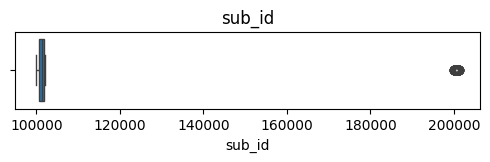

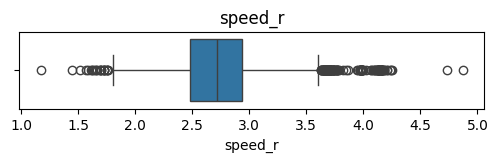

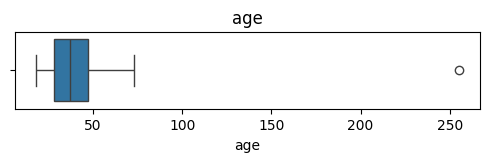

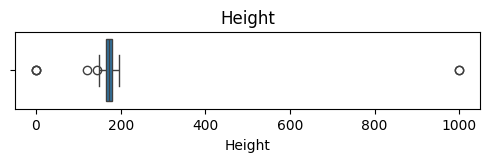

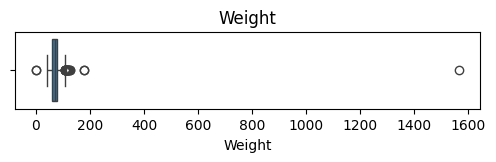

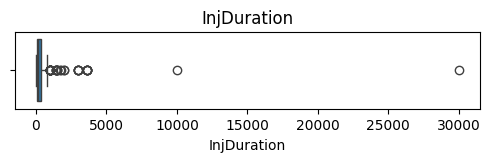

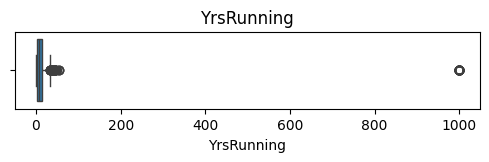

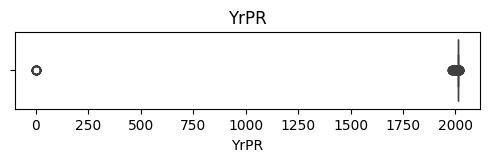

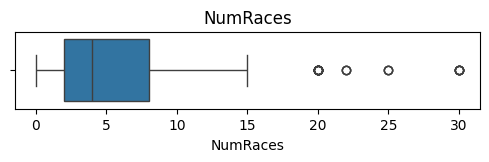

In [47]:
#### Using box-plots to visually spot the outliers

import matplotlib.pyplot as plt
import seaborn as sns


for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()
    

#### Significant outliers we've got:
# - Age
# - Height (on both ends)
# - Weight (on both ends)
# - InjDuration (10,000 and 30,000)
# - YrsRunning (1,000)
# - YrPR (?) (0)